# Jet Thrust Spindown

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

plt.rcParams["figure.figsize"]=10,8 #Set plot size
plt.rcParams.update({'font.size': 16}) #set plot size font
plt.rcParams.update({"axes.grid" : True, "grid.color": "lightgrey"}) #Add grid lines to plot

## Fuel Cut

In [19]:
DataPoints_x = [0.0,0.223,0.243,0.345,0.446,0.547,0.669,0.831,1.074,1.459,2.007,2.615,3.466,4.541,5.453,6]
DataPoints_y = [1.0,0.975,0.837,0.736,0.615,0.506,0.387,0.28,0.199,0.132,0.078,0.047,0.027,0.013,0.004,0.00]

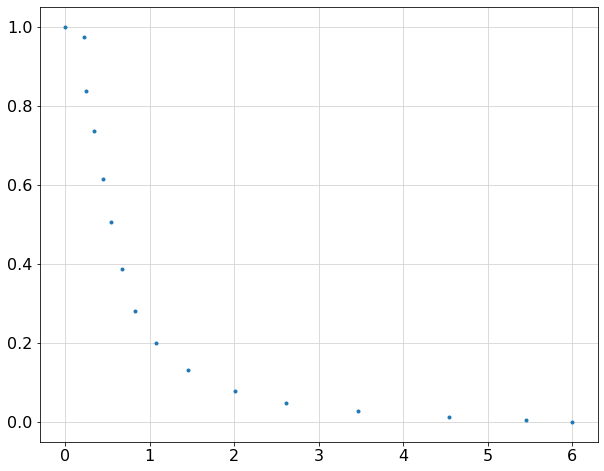

In [20]:
plt.plot(DataPoints_x,DataPoints_y,'.')

1.1195051908214249 1.404420085231313 0.0006502622408186436


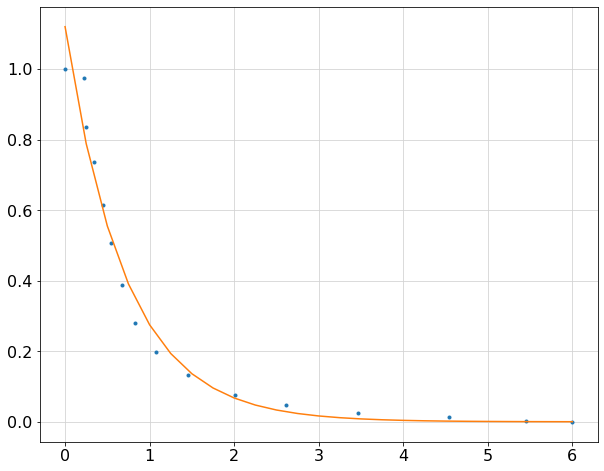

In [21]:
def line(x,a,b,c):
    y = a*np.exp(-b*x) + c
    return y

p, pcov = curve_fit(line,DataPoints_x,DataPoints_y)
a,b,c = p

def fit_eq(x):
    y = a*np.exp(-b*x) + c
    return y

x = np.linspace(0,6,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c)

1.8289953013600455 1.4523128267327676 -3.3579866572439627 0.03681503322688101 0.3063195811384217


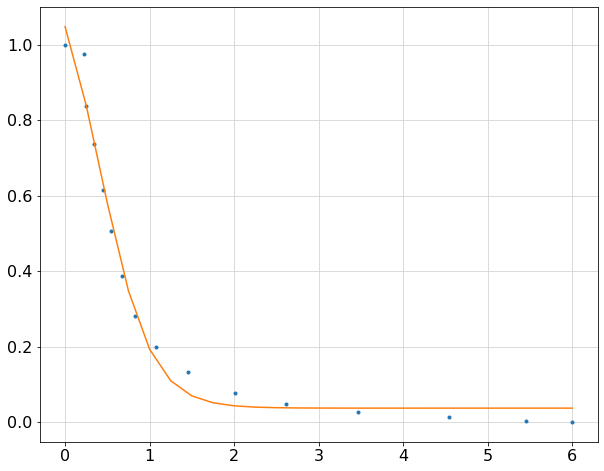

In [22]:
def line(x,a,b,c,d,e):
    y = d+ a/(b+np.exp(-c*(x-e)))
    return y

p, pcov = curve_fit(line,DataPoints_x,DataPoints_y)
a,b,c,d,e = p

def fit_eq(x):
    y = d+ a/(b+np.exp(-c*(x-e)))
    return y

x = np.linspace(0,6,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c,d,e)

#### Testing

-4.999999999984356 2.509492473246873


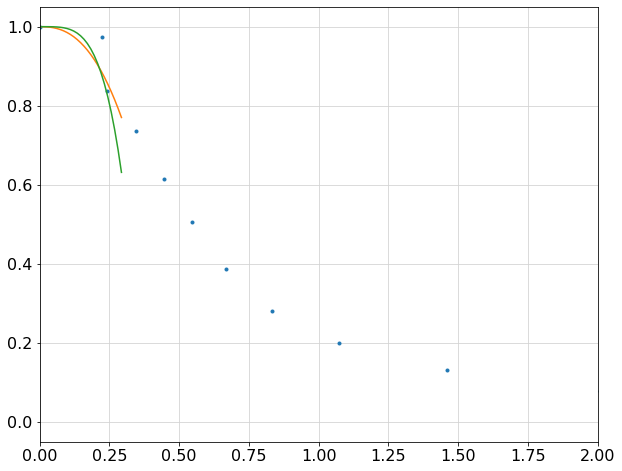

In [23]:
def line(x,a,n):
    y = 1 + a*(x**n)
    return y

p, pcov = curve_fit(line,DataPoints_x[0:3],DataPoints_y[0:3],bounds=((-5,1), (5,5)),sigma=[1,2,1])
a,n = p

def fit_eq(x):
    y = 1 + a*(x**n)
    return y

x = np.linspace(min(DataPoints_x[0:3]),max(DataPoints_x[0:3])+0.05,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))
plt.plot(x,line(x,-50,4))

plt.xlim(0,2)

print(a,n)

### 2nd part Eq

1.283981256139446 1.7050326453612419


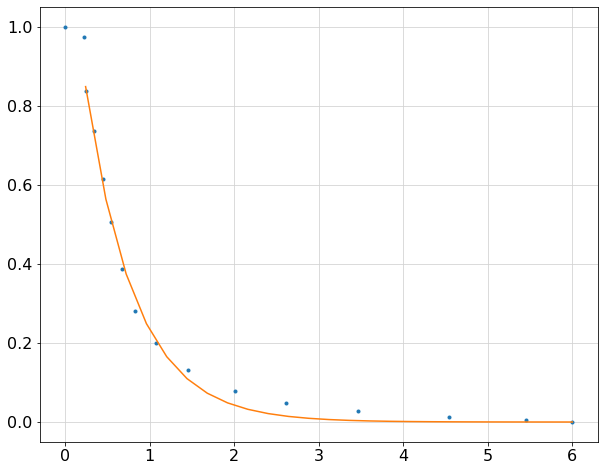

In [24]:
def line(x,a,b):
    y = a*np.exp(-b*x)
    return y

p, pcov = curve_fit(line,DataPoints_x[2:],DataPoints_y[2:])
a,b = p

def fit_eq(x):
    y = a*np.exp(-b*x)
    return y

x = np.linspace(min(DataPoints_x[2:]),max(DataPoints_x[2:]),25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b)

0.28583498467156326 -0.05372408190742123


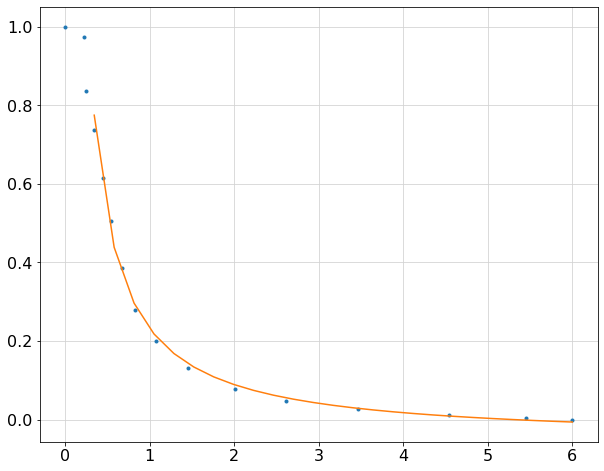

In [25]:
def line(x,a,b):
    y = (a/x)+b
    return y

p, pcov = curve_fit(line,DataPoints_x[3:],DataPoints_y[3:])
a,b = p

def fit_eq(x):
    y = (a/x)+b
    return y

x = np.linspace(min(DataPoints_x[3:]),max(DataPoints_x[3:]),25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b)

0.03505826049116474 1.0806510481558786 1.6745976202802835


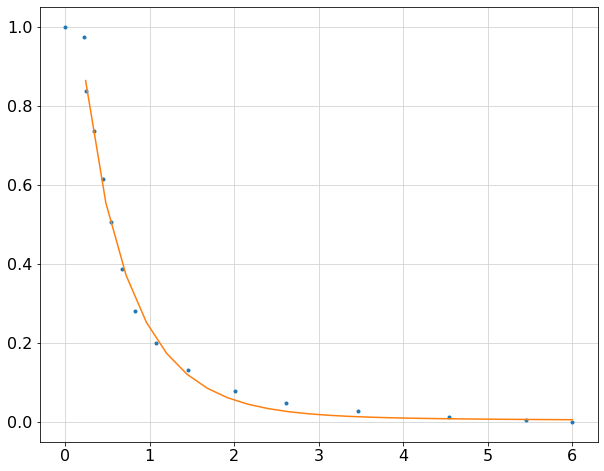

In [26]:
def line(x,a,c,d):
    y = (a/x) + c*np.exp(-d*x) 
    return y

p, pcov = curve_fit(line,DataPoints_x[2:],DataPoints_y[2:])
a,c,d = p

def fit_eq(x):
    y = (a/x) + c*np.exp(-d*x) 
    return y

x = np.linspace(min(DataPoints_x[2:]),max(DataPoints_x[2:]),25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,c,d)

-0.06835803579174568 1.2491462371794197 2.4186605108133903 0.2912086503613424 -0.10786111599849839


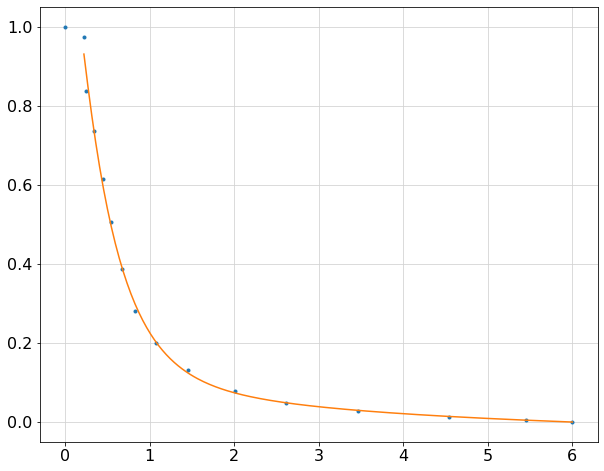

In [27]:
def line(x,a,b,c,d,e):
    y = (a/x) + b*np.exp(-c*x) + d/np.sqrt(x) + e
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b,c,d,e = p

def fit_eq(x):
    y =  (a/x) + b*np.exp(-c*x) + d/np.sqrt(x) +e
    return y

x = np.linspace(min(DataPoints_x[1:]),max(DataPoints_x[1:]),250)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c,d,e)

## Piecewise

In [28]:
def p(x,a,b,c,d,n,x0,x1):
    conds = [x<x0, (x>=x0) & (x<x1),x>=x1]
    funcs = [lambda x:1+a*x**n,lambda x:(b/x)+c*np.exp(-d*x), 0]
    return np.piecewise(x,condlist=conds,funclist=funcs)

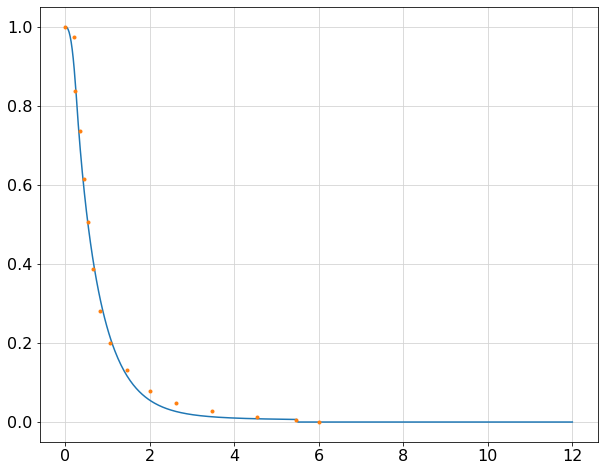

In [29]:
x = np.linspace(0,12,500)
plt.plot(x,p(x,-5,0.035,1.081,1.675,2.51,0.25,5.5))

plt.plot(DataPoints_x,DataPoints_y,'.')

In [30]:
def p(x,a,n,b,c,d,e,f,x0,x1):
    conds = [x<x0, (x>=x0) & (x<x1),x>=x1]
    funcs = [lambda x:1+a*x**n,lambda x:(b/x) + c*np.exp(-d*x) + e/np.sqrt(x) + f, 0]
    return np.piecewise(x,condlist=conds,funclist=funcs)

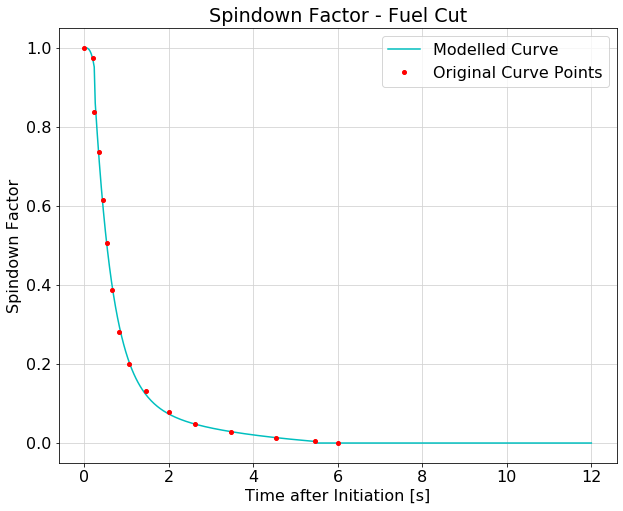

In [61]:
x = np.linspace(0,12,500)
plt.plot(x,p(x,-5,3.25,-0.068,1.249,2.419,0.291,-0.108,0.25,5.5),'c',label = 'Modelled Curve')   
plt.plot(DataPoints_x,DataPoints_y,'r.',markersize =8,label='Original Curve Points')
plt.title('Spindown Factor - Fuel Cut')
plt.xlabel('Time after Initiation [s]')
plt.ylabel('Spindown Factor')
plt.legend()